<a href="https://colab.research.google.com/github/SebastianKosmider/Praktyki/blob/main/Single_molecule_100x100_version_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install h5py
!pip install typing-extensions
!pip install wheel

In [ ]:
!pip install tensorflow==2.8

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 44.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 kB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 47.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 61.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 37.1 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.1
    Uninstalling tensorboard-data-server-0.7.1:
      Successfully uninstalled tensorboard-data-server-0.7.1
  Attempting uninstall: google-auth-oauthlib
    Found existing insta

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import tensorflow as tf
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.__version__

'2.8.0'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/praktyki/rawDataSingleMolecule/gotowe.zip'
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

In [ ]:
training_generator = ImageDataGenerator(rescale=1./255,
                                        horizontal_flip=True,
                                        vertical_flip=True)


In [ ]:
train_dataset = training_generator.flow_from_directory('/content/gotowe/train_set',
                                                       target_size = (100, 100),
                                                       batch_size = 10,
                                                       color_mode='rgb',
                                                       class_mode = 'categorical',
                                                       shuffle = True)

Found 11158 images belonging to 7 classes.


In [ ]:
train_dataset.classes

array([0, 0, 0, ..., 6, 6, 6], dtype=int32)

In [ ]:
train_dataset.class_indices

{'nematyk': 0,
 'smektyk_C': 1,
 'smektyk_F': 2,
 'smektyk_GMosaic': 3,
 'smektyk_GSchliren': 4,
 'smektyk_H': 5,
 'smektyk_I': 6}

In [ ]:
test_generator = ImageDataGenerator(rescale=1./255)
val_generator = ImageDataGenerator(rescale=1./255)

In [ ]:
validation_dataset = val_generator.flow_from_directory('/content/gotowe/val_set',
                                                        target_size=(100, 100),
                                                        batch_size=1,
                                                        class_mode='categorical',
                                                        color_mode='rgb',
                                                        shuffle=True) # set as validation data

Found 1395 images belonging to 7 classes.


In [ ]:
L2 = 0.00001

In [ ]:
test_datatset = test_generator.flow_from_directory('/content/gotowe/test_set',
                                                   target_size = (100, 100),
                                                   batch_size = 1,
                                                   color_mode='rgb',
                                                   class_mode = 'categorical',
                                                   shuffle = False)

Found 1396 images belonging to 7 classes.


In [ ]:
initializer1 = tf.keras.initializers.HeNormal()
initializer2 = tf.keras.initializers.GlorotUniform()

In [ ]:
network = Sequential()
network.add(Conv2D(filters=16, kernel_size=(3,3), activation = 'relu', input_shape = (100,100,3), kernel_initializer=initializer1))
network.add(BatchNormalization())
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Conv2D(filters=32, kernel_size=(3,3), activation = 'relu', padding='same', kernel_initializer=initializer1))
network.add(BatchNormalization())
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Conv2D(filters=64, kernel_size=(3,3), activation = 'relu', padding='same', kernel_initializer=initializer1))
network.add(BatchNormalization())
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Conv2D(filters=128, kernel_size=(3,3), activation = 'relu', padding='same', kernel_initializer=initializer1))
network.add(BatchNormalization())
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Conv2D(filters=256, kernel_size=(1,1), activation = 'relu', padding='same', kernel_initializer=initializer1))
network.add(Conv2D(filters=256, kernel_size=(1,1), activation = 'relu', padding='same', kernel_initializer=initializer1))
network.add(BatchNormalization())
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Conv2D(filters=512, kernel_size=(1,1), activation = 'relu', padding='same', kernel_initializer=initializer1))
network.add(BatchNormalization())
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Flatten())

network.add(Dropout(0.2))

network.add(Dense(units = 512, activation = 'relu', kernel_initializer=initializer1))
network.add(BatchNormalization())
network.add(Dense(units = 512, activation = 'relu', kernel_initializer=initializer1))
network.add(BatchNormalization())
network.add(Dense(units = 128, activation = 'relu', kernel_initializer=initializer1))
network.add(BatchNormalization())
network.add(Dense(units = 32, activation = 'relu', kernel_initializer=initializer1))
network.add(BatchNormalization())
network.add(Dense(units = 32, activation = 'relu', kernel_initializer=initializer1))
network.add(BatchNormalization())
network.add(Dense(units = 16, activation = 'relu', kernel_initializer=initializer1))
network.add(BatchNormalization())
network.add(Dense(units = 16, activation = 'relu', kernel_initializer=initializer1, kernel_regularizer=tf.keras.regularizers.L1L2()))
network.add(BatchNormalization())
network.add(Dense(units = 7, activation = 'softmax', kernel_initializer=initializer2))
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 16)        448       
                                                                 
 batch_normalization (BatchN  (None, 98, 98, 16)       64        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 49, 49, 32)        4640      
                                                                 
 batch_normalization_1 (Batc  (None, 49, 49, 32)       128       
 hNormalization)                                                 
                                                        

In [ ]:
from tensorflow.keras.optimizers import Adam
#opt = Adam(lr=0.005)
opt = Adam()
network.compile(optimizer='Adam', loss='categorical_crossentropy', metrics = ['accuracy'])


In [ ]:
es = EarlyStopping(monitor = 'val_accuracy', min_delta = 0.001, patience = 20, verbose =1)
model_cp = ModelCheckpoint(filepath = 'best_model10.h5', monitor = 'val_accuracy', save_best_only = True, verbose = 1)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 5, verbose=1, factor=0.5, min_lr=0.00001)

In [ ]:
history = network.fit_generator(train_dataset,
                                steps_per_epoch = 50,
                                validation_data = validation_dataset,
                                validation_steps = 50,
                                epochs=100,
                                callbacks=[es, model_cp, learning_rate_reduction])

Epoch 1/100


<ipython-input-18-d45876fe1552>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = network.fit_generator(train_dataset,


50/50 [==============================] - ETA: 0s - loss: 2.1342 - accuracy: 0.1840
Epoch 1: val_accuracy improved from -inf to 0.10000, saving model to best_model10.h5
50/50 [==============================] - 18s 271ms/step - loss: 2.1342 - accuracy: 0.1840 - val_loss: 1.9699 - val_accuracy: 0.1000 - lr: 0.0010
Epoch 2/100
50/50 [==============================] - ETA: 0s - loss: 1.8356 - accuracy: 0.3200
Epoch 2: val_accuracy improved from 0.10000 to 0.12000, saving model to best_model10.h5
50/50 [==============================] - 9s 189ms/step - loss: 1.8356 - accuracy: 0.3200 - val_loss: 2.1118 - val_accuracy: 0.1200 - lr: 0.0010
Epoch 3/100
50/50 [==============================] - ETA: 0s - loss: 1.6380 - accuracy: 0.4020
Epoch 3: val_accuracy improved from 0.12000 to 0.16000, saving model to best_model10.h5
50/50 [==============================] - 12s 245ms/step - loss: 1.6380 - accuracy: 0.4020 - val_loss: 2.0594 - val_accuracy: 0.1600 - lr: 0.0010
Epoch 4/100
50/50 [=============

In [ ]:
predictions=network.predict(test_datatset)
predictions = np.argmax(predictions, axis=1)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(test_datatset.classes, predictions)

0.7406876790830945

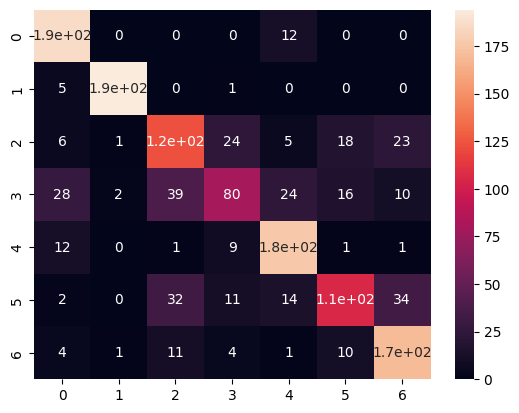

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_datatset.classes, predictions)
sns.heatmap(cm, annot=True);

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_datatset.classes, predictions))

              precision    recall  f1-score   support

           0       0.77      0.94      0.84       198
           1       0.98      0.97      0.97       200
           2       0.60      0.61      0.61       200
           3       0.62      0.40      0.49       199
           4       0.76      0.88      0.81       200
           5       0.70      0.53      0.61       199
           6       0.71      0.84      0.77       200

    accuracy                           0.74      1396
   macro avg       0.73      0.74      0.73      1396
weighted avg       0.73      0.74      0.73      1396



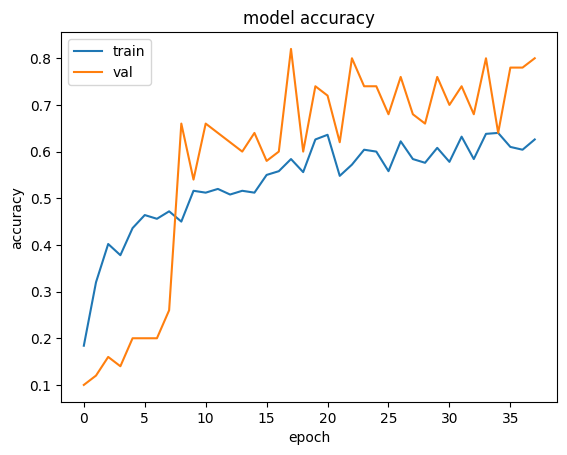

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

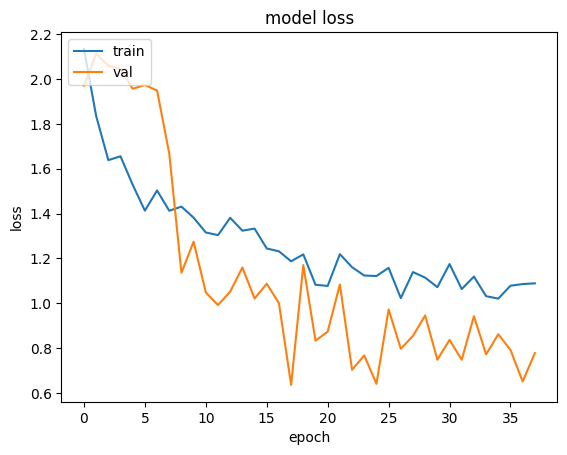

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('/content/best_model10.h5')

In [ ]:
model.evaluate(test_datatset)

1396/1396 [==============================] - 21s 15ms/step - loss: 0.9244 - accuracy: 0.6884


[0.9243826866149902, 0.6883954405784607]

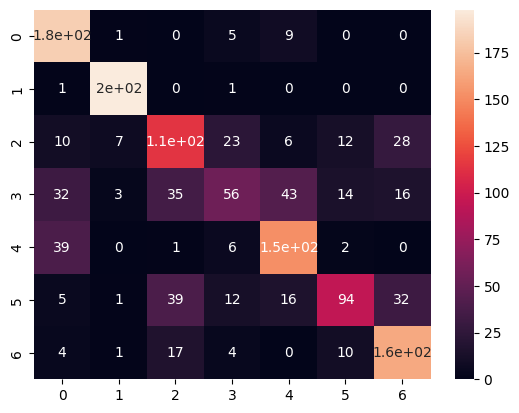

In [ ]:
pred = model.predict(test_datatset)
pred = np.argmax(pred, axis=1)
cm = confusion_matrix(test_datatset.classes, pred)
sns.heatmap(cm, annot=True);

In [ ]:
print(classification_report(test_datatset.classes, pred))

              precision    recall  f1-score   support

           0       0.67      0.92      0.78       198
           1       0.94      0.99      0.96       200
           2       0.55      0.57      0.56       200
           3       0.52      0.28      0.37       199
           4       0.67      0.76      0.71       200
           5       0.71      0.47      0.57       199
           6       0.68      0.82      0.75       200

    accuracy                           0.69      1396
   macro avg       0.68      0.69      0.67      1396
weighted avg       0.68      0.69      0.67      1396



In [ ]:
network.save('network.h5')

In [ ]:
net = load_model('/content/network.h5')

In [ ]:
net.evaluate(test_datatset)

1396/1396 [==============================] - 18s 12ms/step - loss: 0.7880 - accuracy: 0.7407


[0.7879651188850403, 0.7406876683235168]

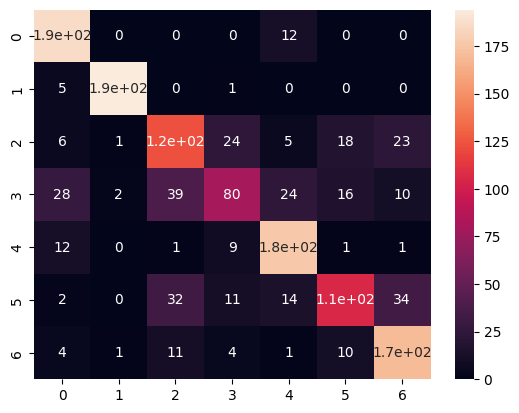

In [ ]:
pre = net.predict(test_datatset)
pre = np.argmax(pre, axis=1)
cm = confusion_matrix(test_datatset.classes, pre)
sns.heatmap(cm, annot=True);

In [ ]:
print(classification_report(test_datatset.classes, pred))

              precision    recall  f1-score   support

           0       0.67      0.92      0.78       198
           1       0.94      0.99      0.96       200
           2       0.55      0.57      0.56       200
           3       0.52      0.28      0.37       199
           4       0.67      0.76      0.71       200
           5       0.71      0.47      0.57       199
           6       0.68      0.82      0.75       200

    accuracy                           0.69      1396
   macro avg       0.68      0.69      0.67      1396
weighted avg       0.68      0.69      0.67      1396

